<a href="https://colab.research.google.com/github/coding-geek1711/DeepLearningBabySteps/blob/master/Keras_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ** So This is it...Keras **

### Here we make a simple neural network and go until we make predictions and plot a confusion matrix

In [0]:
!pip install keras

###  Preprocessing

In [0]:
import tensorflow as tf
tf.__version__



'1.15.0'

In [0]:

from random import randint
from sklearn.preprocessing import MinMaxScaler
import numpy as np

We declare our labels now

In [0]:
train_labels = []
train_samples = []


So now for the sake of the tutorial we create a dataset on our own, 


1.   A drug was tested on individuals from 13 to 100
2.   Trial had 2100 people half were under 65 and half were above 65
3.   95% of patients above 65 had side effects
4.   95% of patients below 65 had no side effects







In [0]:
for i in range(50):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)
  
for i in range(1000):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)

In [0]:
train_samples

[18,
 86,
 61,
 81,
 47,
 68,
 32,
 69,
 35,
 86,
 41,
 75,
 36,
 82,
 50,
 65,
 36,
 88,
 46,
 85,
 13,
 84,
 53,
 99,
 25,
 87,
 53,
 98,
 34,
 70,
 33,
 84,
 53,
 92,
 60,
 69,
 36,
 66,
 23,
 97,
 56,
 76,
 42,
 78,
 47,
 97,
 33,
 80,
 27,
 94,
 52,
 75,
 21,
 70,
 29,
 90,
 14,
 70,
 44,
 89,
 32,
 69,
 64,
 72,
 45,
 100,
 24,
 90,
 26,
 98,
 24,
 91,
 51,
 86,
 53,
 71,
 41,
 82,
 26,
 71,
 52,
 71,
 29,
 97,
 33,
 76,
 23,
 82,
 49,
 93,
 42,
 97,
 25,
 84,
 25,
 99,
 52,
 74,
 34,
 85,
 35,
 67,
 60,
 75,
 53,
 77,
 60,
 89,
 26,
 73,
 50,
 78,
 32,
 68,
 29,
 68,
 59,
 87,
 24,
 90,
 49,
 89,
 40,
 67,
 63,
 74,
 35,
 88,
 62,
 67,
 26,
 76,
 48,
 71,
 46,
 66,
 18,
 96,
 23,
 94,
 19,
 88,
 41,
 85,
 53,
 99,
 43,
 65,
 32,
 98,
 62,
 71,
 40,
 96,
 64,
 70,
 23,
 88,
 60,
 79,
 49,
 73,
 41,
 90,
 50,
 65,
 17,
 69,
 44,
 72,
 40,
 85,
 55,
 78,
 56,
 66,
 45,
 97,
 39,
 96,
 21,
 92,
 20,
 98,
 28,
 76,
 23,
 77,
 35,
 71,
 35,
 90,
 20,
 91,
 39,
 88,
 56,
 91,
 25,
 95,

In [0]:
train_labels

[1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,


We make a numpy array for keras to understand things


In [0]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

Now we use scikit learns MinMaxScaler to convert numbers ranging from 13 to 100 to numbers between 0 and 1

Also fit_transform function doesnt accept 1D array, so we have to convert using reshape.![alt text](https://drive.google.com/uc?id=1CU9QseZ6fupI471toMiEkkSs_rafp6a9)

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform((train_samples.reshape(-1, 1)))

In [0]:
scaled_train_samples

array([[0.05747126],
       [0.83908046],
       [0.55172414],
       ...,
       [0.97701149],
       [0.03448276],
       [0.65517241]])

### Now We Create a simple sequential model with keras


In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Keras Sequential Model is a model where each layer is part of an array which upon execution is executed sequentially

WAYS TO ADD A LAYER 

*   model = Sequential([l1, l2, l3, l4]) as per ur desired sequence
*   model.add(layer_number)
*   model.app(layer_number)

First layer is going to be the Dense layer

In [0]:
model = Sequential([
                    Dense(16, input_shape = (1, ), activation = 'relu'),       ### Dense(number of neurons, '''if its the first layer then only''' input_shape = (shape of data input), activation = 'activation function in single quotes' )
                    Dense(32, activation='relu'), 
                    Dense(2, activation='softmax')                                                                        ### This is gonna be the output layer from earlier and hence they have only two units, either a yes to side effect or a no to side effect
])

Now our Keras Sequential model is created , now to see its summary

In [0]:
model.summary()       # the summary of the model is shown

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


Now we train our dataset on this model which we created


First we need to compile our model

### So, we pass a few arguments first is the optimizer, we can use several but now we use Adam, which if used has to be given a learning rate lr, then the next argument is loss, again there are several documented in keras, and last argument is metrics, which are also documeneted in keras

In [0]:
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])      

### model.fit(training_data, training_data_labels, batch_size=arbitrarily chosen batch size, epochs = number of goes through our dataset, shuffle = True means each epoch the dataset is randomized to avoid training on the same data over and over again, verbose = 2 means how much info to be displayed during training)

batch size means the amount of dataset chosen at one epoch to be trained upon


In [0]:
model.fit(scaled_train_samples, train_labels,batch_size=10, epochs=20, shuffle = True, verbose=2)    

Epoch 1/20
 - 0s - loss: 0.2642 - acc: 0.9756
Epoch 2/20
 - 0s - loss: 0.2531 - acc: 0.9746
Epoch 3/20
 - 0s - loss: 0.2440 - acc: 0.9751
Epoch 4/20
 - 0s - loss: 0.2356 - acc: 0.9756
Epoch 5/20
 - 0s - loss: 0.2274 - acc: 0.9756
Epoch 6/20
 - 0s - loss: 0.2193 - acc: 0.9756
Epoch 7/20
 - 0s - loss: 0.2112 - acc: 0.9756
Epoch 8/20
 - 0s - loss: 0.2040 - acc: 0.9756
Epoch 9/20
 - 0s - loss: 0.1966 - acc: 0.9751
Epoch 10/20
 - 0s - loss: 0.1896 - acc: 0.9756
Epoch 11/20
 - 0s - loss: 0.1840 - acc: 0.9756
Epoch 12/20
 - 0s - loss: 0.1797 - acc: 0.9756
Epoch 13/20
 - 0s - loss: 0.1762 - acc: 0.9756
Epoch 14/20
 - 0s - loss: 0.1736 - acc: 0.9756
Epoch 15/20
 - 0s - loss: 0.1715 - acc: 0.9756
Epoch 16/20
 - 0s - loss: 0.1700 - acc: 0.9756
Epoch 17/20
 - 0s - loss: 0.1684 - acc: 0.9756
Epoch 18/20
 - 0s - loss: 0.1670 - acc: 0.9756
Epoch 19/20
 - 0s - loss: 0.1656 - acc: 0.9756
Epoch 20/20
 - 0s - loss: 0.1645 - acc: 0.9756


### Now if we look at the results above we see that the loss steadily decreases and the accuracy steadily increases, epoch_1 acc ~ 59% and epoch _20 acc ~ 96% epoch_1 loss = 0.66 and epoch_20 loss = 0.17....therefore as epochs increase, loss decreases and accuracy increases

### VALIDATION SET CREATION
Validation set are those part of our dataset upon which the model is not trained ie we set them aside. The aim to do so arises from the basic requirement of the neural net to learn from our training data and predict something which it has not trained on.


The way to do so is to split our dataset into two parts, the training part and the validation part.What happens then is the net tests itself after training on the training dataset on the validation dataset every single epoch and the loss and accuracy of both the training and validation dataset is observed in the model.fit(). This allow u to see how well ur model is able to generaize and also it helps to know whether our model is overfitting.

Overfittiing generally means that our model is only learning the specificities for our training dataset and does not generalize well on the data outside the training dataset

The ways to use the valid_set is as follows:




1.   First we declare a validation set as follows
valid_set = [(sample, label), (sample, label), .....(sample, label)]
Then we put that in model.fit as follows
model.fit(scaled_train_samples, train_labels, **validation_data=valid_set**, batch_size=10, epochs=20, shuffle = True, verbose=2)   


2. Or we can do this 
model.fit(scaled_train_samples, train_labels,** validation_split=0.1, **batch_size=10, epochs=20, shuffle = True, verbose=2)      


What validation_split does is it splits our training data into two parts, 90% on which it trains and 10% on which it validates, the 0.1 can be adjusted as per desire



In [0]:
model.fit(scaled_train_samples, train_labels, validation_split = 0.1, batch_size=10, epochs=20, shuffle = True, verbose=2)    

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.6737 - acc: 0.5360 - val_loss: 0.6528 - val_acc: 0.5762
Epoch 2/20
 - 0s - loss: 0.6479 - acc: 0.5921 - val_loss: 0.6224 - val_acc: 0.6333
Epoch 3/20
 - 0s - loss: 0.6247 - acc: 0.6365 - val_loss: 0.5945 - val_acc: 0.7000
Epoch 4/20
 - 0s - loss: 0.6021 - acc: 0.6820 - val_loss: 0.5665 - val_acc: 0.7476
Epoch 5/20
 - 0s - loss: 0.5794 - acc: 0.7201 - val_loss: 0.5378 - val_acc: 0.7810
Epoch 6/20
 - 0s - loss: 0.5560 - acc: 0.7593 - val_loss: 0.5078 - val_acc: 0.8286
Epoch 7/20
 - 0s - loss: 0.5290 - acc: 0.7910 - val_loss: 0.4730 - val_acc: 0.8571
Epoch 8/20
 - 0s - loss: 0.5018 - acc: 0.8233 - val_loss: 0.4404 - val_acc: 0.9000
Epoch 9/20
 - 0s - loss: 0.4758 - acc: 0.8471 - val_loss: 0.4075 - val_acc: 0.9143
Epoch 10/20
 - 0s - loss: 0.4505 - acc: 0.8577 - val_loss: 0.3767 - val_acc: 0.9286
Epoch 11/20
 - 0s - loss: 0.4271 - acc: 0.8735 - val_loss: 0.3480 - val_acc: 0.9333
Epoch 12/20
 - 0s - loss: 0.4058 - acc

This is not a case of Overfitting of data, 

In overfitting the models accuracy on training side is increasing but stagnates on the validation side, 

and 

the models loss on the training side decreases on the training side but is actually increasing on the validation side


### **PREDICT** 
We need to preprocess test data which we use to predict our side effect occurence

In [0]:
### preprocessing
test_samples = []
test_labels = []
for i in range(10):
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(1)

In [0]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [0]:
### prediction
prediction = model.predict(scaled_test_samples, batch_size=10, verbose=2)

In [0]:
prediction

array([[0.85902387, 0.14097606],
       [0.08653699, 0.91346294],
       [0.48869094, 0.5113091 ],
       [0.09378345, 0.9062165 ],
       [0.915371  , 0.084629  ],
       [0.04737702, 0.95262295],
       [0.91582227, 0.08417773],
       [0.06547555, 0.9345244 ],
       [0.7943509 , 0.20564902],
       [0.05280788, 0.94719213],
       [0.915371  , 0.084629  ],
       [0.07677455, 0.9232254 ],
       [0.8963086 , 0.10369135],
       [0.27362463, 0.72637534],
       [0.9155647 , 0.08443531],
       [0.07677455, 0.9232254 ],
       [0.8766623 , 0.1233377 ],
       [0.12927605, 0.8707239 ],
       [0.900467  , 0.09953302],
       [0.06905862, 0.9309414 ],
       [0.8825958 , 0.11740423],
       [0.25551414, 0.74448586],
       [0.8485916 , 0.1514084 ],
       [0.11915231, 0.88084763],
       [0.44239268, 0.5576073 ],
       [0.35345578, 0.6465442 ],
       [0.8231108 , 0.17688914],
       [0.06547555, 0.9345244 ],
       [0.7449836 , 0.25501636],
       [0.04737702, 0.95262295],
       [0.

In [0]:
rounded_prediction = model.predict_classes(scaled_test_samples, batch_size=10, verbose = 0)

In [0]:
rounded_prediction

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,

In [0]:
test_samples

array([ 41,  86,  61,  85,  19,  97,  26,  91,  46,  95,  19,  88,  35,
        71,  22,  88,  39,  81,  34,  90,  38,  72,  42,  82,  63,  67,
        44,  91,  49,  97,  43,  88,  54,  99,  42,  87,  36,  80,  26,
        97,  36,  95,  39,  70,  53,  96,  39,  78,  46,  97,  37,  98,
        21,  81,  54,  66,  47,  73,  40,  76,  55,  91,  27,  93,  49,
        76,  55,  70,  59,  78,  29,  77,  40,  97,  44,  79,  39,  93,
        57,  95,  35,  82,  13,  68,  25,  90,  41,  69,  55,  99,  53,
        79,  16,  86,  23,  95,  35, 100,  16,  95,  31,  90,  53,  81,
        28,  70,  14,  91,  23,  82,  26,  88,  13,  72,  40,  95,  18,
        98,  13,  88,  49, 100,  23,  75,  43,  83,  34,  71,  17,  92,
        61,  71,  40,  80,  60,  74,  28,  84,  13,  93,  30,  65,  42,
        99,  31,  75,  51,  75,  46,  76,  61, 100,  18,  81,  19,  72,
        64,  85,  34,  97,  63,  74,  23,  84,  42,  88,  56,  92,  55,
        79,  27,  67,  54, 100,  19,  97,  15,  74,  33,  76,  2

### Create a Confusion matrix using scikit learn

In [0]:
from sklearn.metrics import confusion_matrix

import itertools
import matplotlib.pyplot as plt

In [0]:
cm = confusion_matrix(test_labels, rounded_prediction)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[186  24]
 [  9 201]]


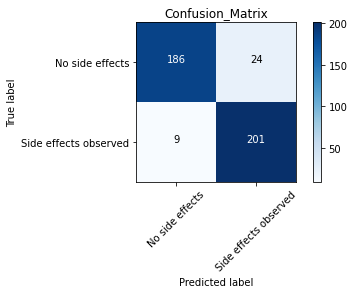

In [0]:
cm_labels = ['No side effects', 'Side effects observed']
plot_confusion_matrix(cm, cm_labels, title='Confusion_Matrix')

### NOW WE ARE GONNA LEARN HOW TO SAVE OUR MODEL
The function we use is gonna be model.save()

In [0]:
model.save('C:')